<h1 align="center"> <font color="tomato">Credit Fraud Detection</h1></font>

<h3>Credits  </h3>
A lot of code that you'll see have been taken form Stack overflow, kaggle, blogs and official documentation. I have tried to include references wherever I could have but nevertheless a big thank you to the whole community.

<h3>Version </h3>
Also please note this notebook was compiled on 17 November 2019 and following were the versions of the libraries.
    <li> Python - 3.7.3
    <li> Pandas - 0.25.3 
    <li> Numpy - 1.17.4 <br>
        
And for no reason at all, I want you to look at this cute cat photo.
<br>
<img src="https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/black-and-white-cat-with-white-mustache-royalty-free-image-908714708-1542816607.jpg?crop=1xw:1xh;center,top&resize=480:*">

<h1 align="center"><font color="teal"> Notebook Sections</h1></font>

Credit card fraud falls in the orbit of anomaly detection usually due to low event rate (fraud rate). So in this notebook I will be looking at how to deal with class imbalance using the various methods of sampling. Also I will be focusing on choosing and optimizing the best model & evaluation metric(s) germane to class imbalance problems. These are the two key sections.

As with all other problems, there will be two sections on data exploration and feature engineering.
* <font size="+1">[Data Exploration](#exploration)</font>
* <font size="+1">[Data Processing](#processing)</font>
* <font size="+1">[Sampling](#sampling)</font>
* <font size="+1">[Modelling](#modelling)</font>
* <font size="+1">[Encapsulation](#encapsulation)</font>



In [3]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf #For Deep Learning
import matplotlib.pyplot as plt #Plotting
import seaborn as sns #Viz
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD #Dimensionality reduction
import matplotlib.patches as mpatches 
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [62]:
#https://towardsdatascience.com/get-faster-pandas-with-modin-even-on-your-laptops-b527a2eeda74

In [61]:
from platform import python_version

print("Python Version:",python_version())
print("Pandas Version:",pd.__version__)
print("Numpy Version:",np.__version__)

Python Version: 3.7.3
Pandas Version: 0.25.3
Numpy Version: 1.17.4


In [5]:
# reading the data in the df object

df = pd.read_csv(r'G:\Learning\Projects\Data Science\Weekend_Hackathons\Credit_Card_Fraud\Data\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print("The dataframe has {} rows and {} columns".format(df.shape[0], df.shape[1]))

The dataframe has 284807 rows and 31 columns


In [8]:
pd.set_option('display.max_columns', 32)  # So that we can see all the columns

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**About the Data:** 

The 28 'V' columns have been derived from the PCA. This was mentioned in the dataset.
The time and amount column are unchanged.

In [9]:
# Here I was trying to take the max of the column of missing values
df.isnull().sum().max()

#So there is no missing values.

0

In [10]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Observation:**

This is the classic case of class imbalance.<br>
Thus even if our model is predicting everything as non-fraud. We will have a fantastic accuracy of 99.83%.<br>
Good Metrics for performance here would be precision-recall and auc-roc.

https://stats.stackexchange.com/questions/222558/classification-evaluation-metrics-for-highly-imbalanced-data


<a id="exploration"></a>

## Exploration

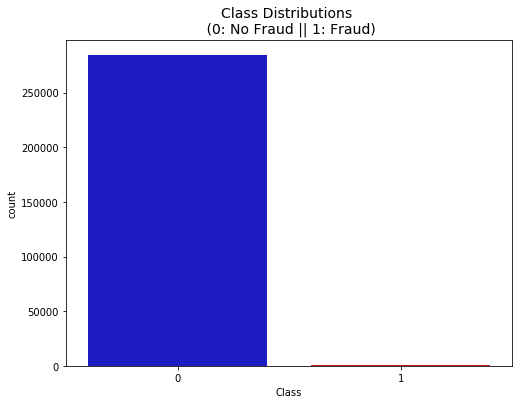

In [44]:
colors = ["#0101DF", "#DF0101"]
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)

sns.countplot(df['Class'],palette=colors, ax=ax);
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14);

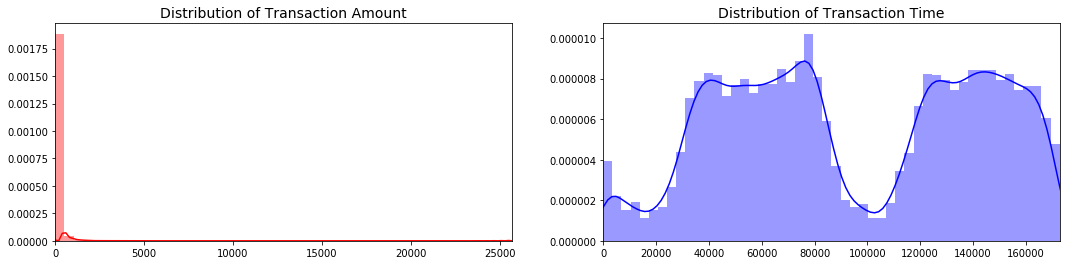

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))


amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

As can be seen that the transaction amount is a little skewed. 

so its better to take the log to tranform the distribution and then compare the plots.

These are two good links to look at, in this respect:
- https://stats.stackexchange.com/questions/267078/why-is-skewed-data-not-preferred-for-modelling
- https://medium.com/@ODSC/transforming-skewed-data-for-machine-learning-90e6cc364b0


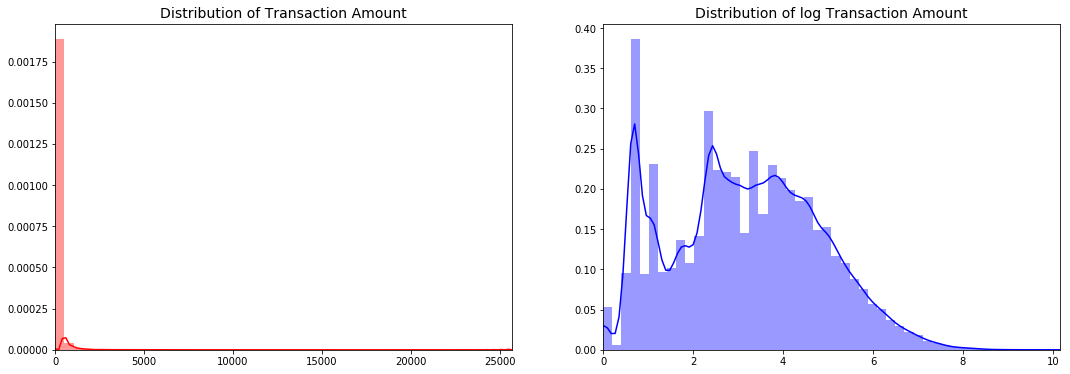

In [43]:
log_amount_val = np.log1p(amount_val)
#here I am taking the log of transaction amount so that we can compare the two distributions.
fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(log_amount_val, ax=ax[1], color='b');
ax[1].set_title('Distribution of log Transaction Amount', fontsize=14)
ax[1].set_xlim([min(log_amount_val), max(log_amount_val)]);


# Here though the data is better distributed than original. But I still don't think it is gaussian distribution.
# I did do a bit of research on how to tranform this into gaussian but couldn't get much success.

In [45]:
# Adding the log_transformed column to the dataset

df['log_amount'] = log_amount_val

In [47]:
# Reordering columns to a desirable order.
#https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

cols = df.columns.tolist() #Converting the column names which are indexes into list
_ = [cols[-1]]+[cols[-3]]+cols[:-3]+[cols[-2]] # reordering the list by slicing and dicing
df = df[_] #giving the new order in the dataframe

In [71]:
#I am changing all the columns to lower case, i am more comfortable that way

df.columns = df.columns.str.lower()

<a id="processing"></a>

## Data Processing 

### Train-Test Split 

In [75]:
df['class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: class, Length: 284807, dtype: int64

In [83]:
y = df.iloc[:,-1]
X = df.iloc[:,:-1]

In [91]:
# I think all the scaling and outlier treatment should be done only on training set as the test set should be left the way it is.

#So it is better to divide and leave it untouched.

original_Xtrain, Xtest, original_ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=17)

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ytest, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(ytest))

#Almost same. we'll take that.

Label Distributions: 

[0.99826448 0.00173552]
[0.99829126 0.00170874]


In [88]:
ytest.shape

(85443,)

### Scaling


Since I have not done outlier treatment, I will be doing scaling by using robust scaler.
This is much more better when scaling with potential outliers.
This does by dealing with median and quantiles.

More information can be found here:
https://stackoverflow.com/questions/51841506/data-standardization-vs-normalization-vs-robust-scaler

Also as we already log transformed the amount so I think we don't have to worry about scaling or outliers.

In [111]:
# Also it is better to do scaling before sampling 

In [113]:
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

scaled_time_train = rob_scaler.fit_transform(original_Xtrain['time'].values.reshape(-1,1))
scaled_time_test = rob_scaler.transform(Xtest['time'].values.reshape(-1,1))

original_Xtrain.insert(0, 'scaled_time', scaled_time_train)
Xtest.insert(0, 'scaled_time', scaled_time_test)


In [115]:
original_Xtrain.drop(['amount','time'], inplace=True, axis=1)
Xtest.drop(['amount','time'], inplace=True, axis=1)

### sampling 

** Note:**
To assess the correlations properly, it is important that the two classes are in equal proportions.
Otherwise the correlations will be very misleading.

In [116]:
# Merging the two dataframes together to create the training df

df_train_original = pd.concat([original_Xtrain, original_ytrain], axis=1)

In [117]:
# amount of fraud classes 346 rows.
fraud_df = df_train_original.loc[df_train_original['class'] == 1]
non_fraud_df = df_train_original.loc[df_train_original['class'] == 0]

new_df = pd.concat([fraud_df, non_fraud_df.sample(n=346)])

#Shuffling the dataframes
from sklearn.utils import shuffle
new_df = shuffle(new_df)

#resetting indexes due to shuffling
new_df.reset_index(drop=True, inplace=True)
print(np.unique(new_df['class'], return_counts=True)[1])

new_df.head()

[346 346]


,scaled_time,log_amount,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,class
0,-0.793431,1.566530,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,-0.554224,0.154921,-2.776757,1.641207,-0.456077,-1.240414,0.857323,1.707024,0.526349,-0.865105,-0.143435,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,1
1,0.701067,1.061257,1.958950,0.639028,-0.804792,3.718081,0.424893,-0.492608,0.314634,-0.213109,-1.078015,1.560215,-1.213117,-0.568555,-0.274421,0.476244,-0.277957,0.938357,-0.924456,-0.165130,-1.716222,-0.315833,0.218969,0.634721,0.060698,-0.044183,0.124141,0.135455,-0.047810,-0.053766,0
2,-0.312037,1.806648,-0.443794,1.271395,1.206178,0.790371,0.418935,-0.848376,0.917691,-0.235511,-0.285692,-0.867900,0.614977,-0.657948,-0.948412,-1.635145,1.263203,0.068533,1.325794,0.376383,-1.096196,-0.067205,0.119279,0.513479,-0.264243,0.443311,0.029516,-0.335141,-0.188815,-0.123391,1
3,0.797518,1.244155,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,1.280167,0.470865,0.435542,0.594974,-0.142099,-2.024735,0.828291,-1.274787,0.134277,-1.489434,-0.125877,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,1
4,-0.265209,4.981138,-1.374717,-0.222931,0.809794,-1.843881,-0.129950,-1.039375,1.179601,-0.275825,0.510179,-1.238066,1.319933,1.025431,-0.047389,0.341507,0.334505,-0.204060,-0.783307,0.673756,0.277091,-0.284695,0.215527,0.816836,0.177130,0.346524,0.190678,-0.823547,-0.069745,0.257834,0


In [97]:
df_train_original['class'].value_counts()/len(df_train_original)

0    0.998264
1    0.001736
Name: class, dtype: float64

In [98]:
df_train_original['class'].value_counts()

0    199018
1       346
Name: class, dtype: int64

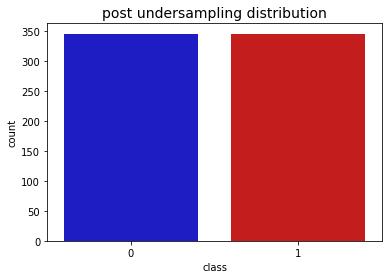

In [108]:
sns.countplot('class', data=new_df, palette=colors)
plt.title('post undersampling distribution', fontsize=14)

plt.show()

### correlation 

----------------------------------------------------------------------------------------------------


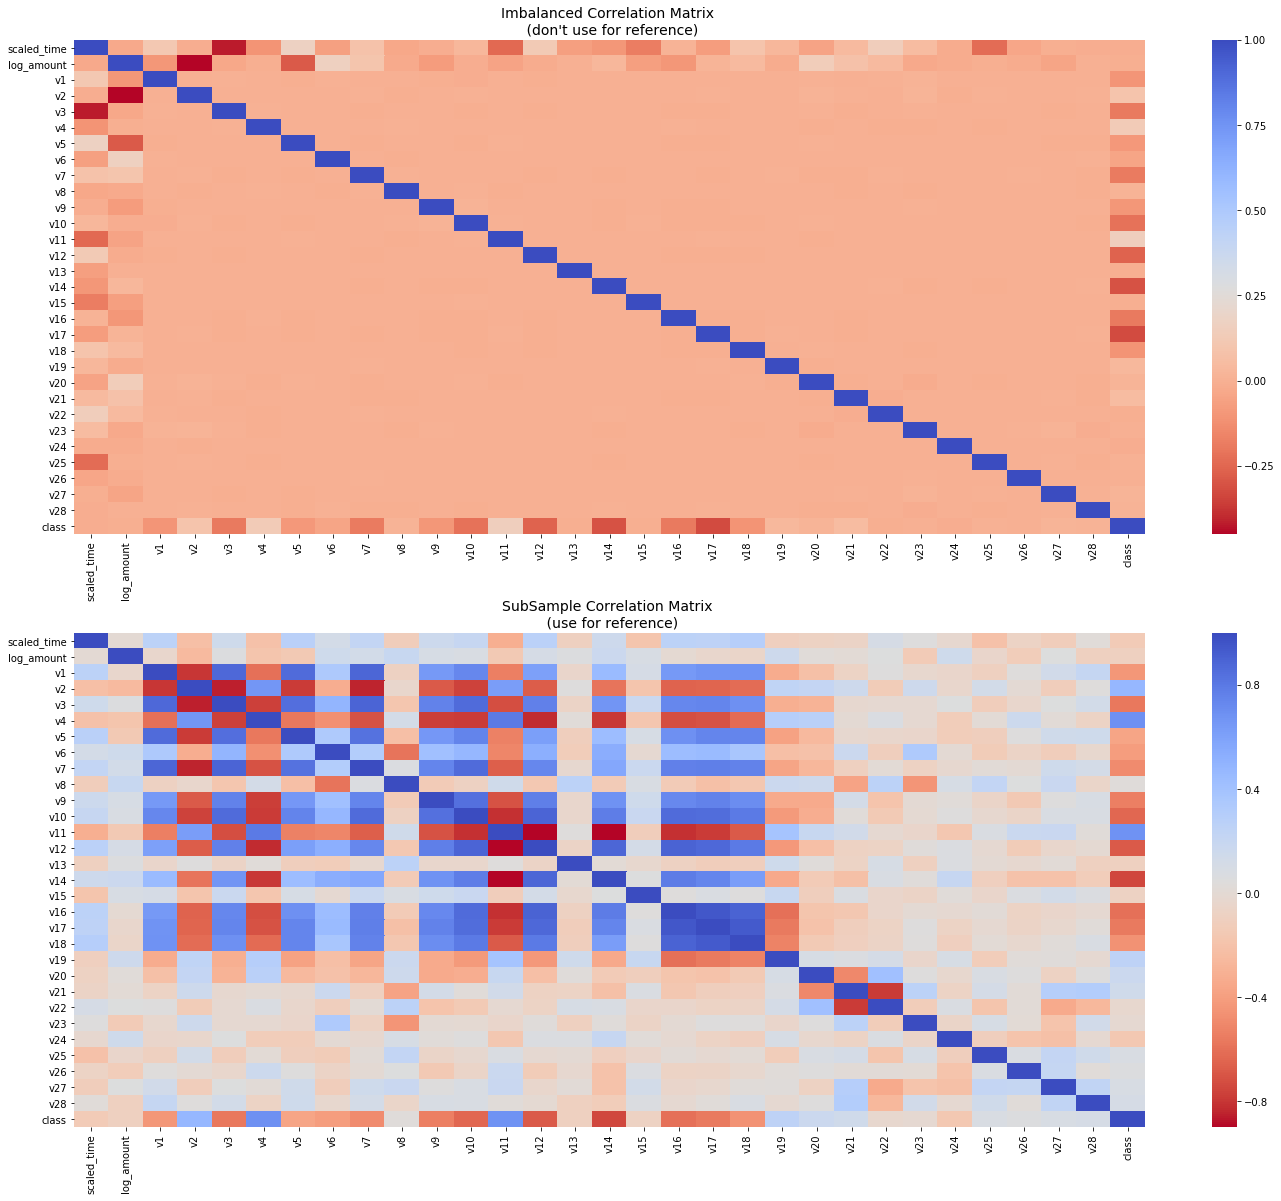

In [119]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df_train_original.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1, linecolor='b')
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


# Downsampled DF
sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

<h4> Negative Correlation </h4>

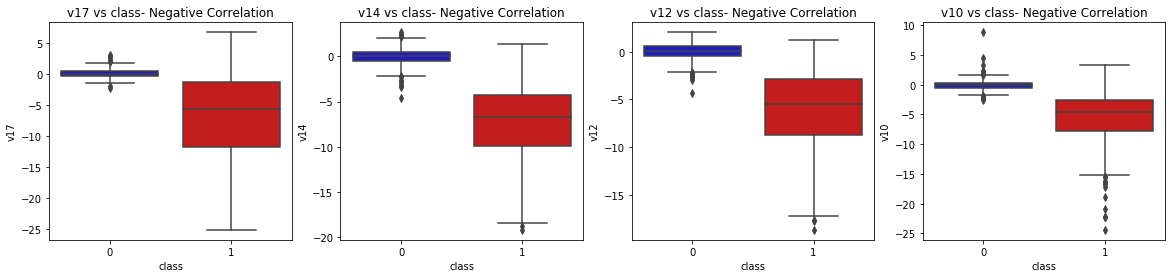

In [127]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Always remember the 'f' variable will not be of much use
# The axes can be considered as an individual plot and various plotting parameters can be applied to it.

# Negative Correlations with our class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="class", y="v17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('v17 vs class- Negative Correlation')


sns.boxplot(x="class", y="v14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('v14 vs class- Negative Correlation')


sns.boxplot(x="class", y="v12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('v12 vs class- Negative Correlation')


sns.boxplot(x="class", y="v10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('v10 vs class- Negative Correlation')

plt.show()

*It can be clearly seen in the plots above that there is a clear difference between the two classes in these variables and as the value decreases the more probable it is to be fraud* 

<h4> positive correlation </h4>

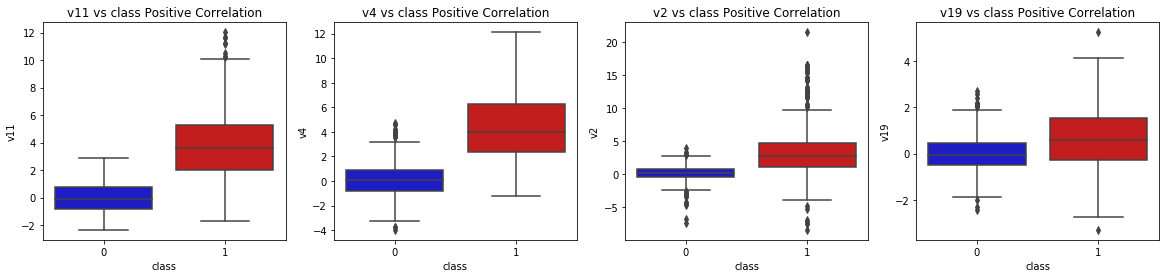

In [129]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="class", y="v11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('v11 vs class Positive Correlation')

sns.boxplot(x="class", y="v4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('v4 vs class Positive Correlation')


sns.boxplot(x="class", y="v2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('v2 vs class Positive Correlation')


sns.boxplot(x="class", y="v19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('v19 vs class Positive Correlation')

plt.show()

### Outlier treatment 

In [133]:
# # -----> v14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['v14'].loc[new_df['class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('v14 Lower: {}'.format(v14_lower))
print('v14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature v14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('v10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['v14'] > v14_upper) | (new_df['v14'] < v14_lower)].index)
print('----' * 44)

# -----> v12 removing outliers from fraud transactions
v12_fraud = new_df['v12'].loc[new_df['class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('v12 Lower: {}'.format(v12_lower))
print('v12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('v12 outliers: {}'.format(outliers))
print('Feature v12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['v12'] > v12_upper) | (new_df['v12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)


# Removing outliers v10 Feature
v10_fraud = new_df['v10'].loc[new_df['class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('v10 Lower: {}'.format(v10_lower))
print('v10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('v10 outliers: {}'.format(outliers))
print('Feature v10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['v10'] > v10_upper) | (new_df['v10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25: -9.946190202462098 | Quartile 75: -4.22839083822685
iqr: 5.7177993642352485
Cut Off: 8.576699046352873
v14 Lower: -18.52288924881497
v14 Upper: 4.348308208126023
Feature v14 Outliers for Fraud Cases: 2
v10 outliers:[-18.8220867423816, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
v12 Lower: -17.423222898854128
v12 Upper: 5.910616286380481
v12 outliers: [-18.683714633344298]
Feature v12 Outliers for Fraud Cases: 1
Number of Instances after outliers removal: 689
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
v10 Lower: -15.038215815136686
v10 Upper: 5.028385654897891
v10 outliers: [-16.6496281595399, -22.1870885620007, -15.2399619587112, -24.403184969972802, -17.141513641289198, -18.9132433348732, -2

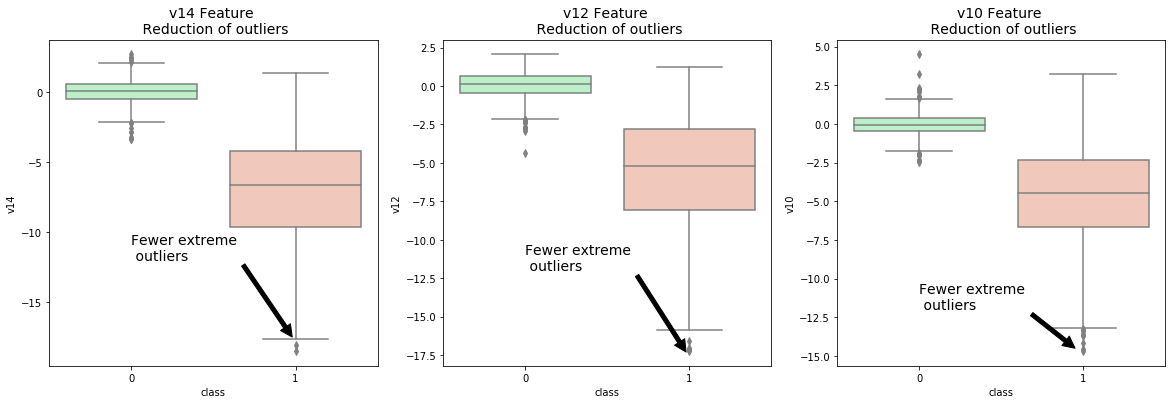

In [138]:
"""
Annotate is a useful function to add text and arrow to a plot
#https://jakevdp.github.io/PythonDataScienceHandbook/04.09-text-and-annotation.html
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html

In the arguements the xy point depicts which point to annotate and xytest indicates where to place the text.
So naturally I believe the arrow will point towards the point from the text.

"""

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature v14
sns.boxplot(x="class", y="v14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("v14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="class", y="v12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("v12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature v10
sns.boxplot(x="class", y="v10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("v10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -14.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

<a id="sampling"></a>

## Sampling

**Note:**

I already implemented undersampling in the above section. <br>
Now the next logical step would be to oversample. For that I would implement SMOTE(create synthetic samples) <br>
But it has been noted that it is best create synthentic samples during cross-validation and not previously.

<a id="modelling"></a>

## Modelling 

In [141]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('class', axis=1)
X = X.values
y = new_df['class']
y = y.values
print(X.shape)
print(y.shape)

(670, 30)
(670,)


### Defining the classifiers 

In [143]:
# Here we are using the classifiers with the basic parameters

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [147]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X, y)
    training_score = cross_val_score(classifier, X, y, cv=5)
    #training_score = cross_val_score(classifier, X, y, cv=5,scoring='recall')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % accuracy score


### grid search for parameter tuning 

In [152]:
tic = time.time()
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
#Type of regularization and the penalty


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X, y)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
#number of neightbours and optimization method

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X, y)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
#type of kernel and rate of regularization

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X, y)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
#Split criterion, max depth and min number of leaf

grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X, y)

# tree best estimator
tree_clf = grid_tree.best_estimator_

toc = time.time()
print("The total time elapsed is {} seconds".format(toc-tic))

The total time elapsed is 3.0986900329589844 seconds


In [154]:
# Mean scores

log_reg_score = cross_val_score(log_reg, X, y, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X, y, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X, y, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X, y, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.28%
Knears Neighbors Cross Validation Score 92.54%
Support Vector Classifier Cross Validation Score 93.88%
DecisionTree Classifier Cross Validation Score 88.81%


In [156]:
# making predictions using cross val predict
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X, y, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X, y, cv=5)

svc_pred = cross_val_predict(svc, X, y, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X, y, cv=5)

In [159]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y, tree_pred))

Logistic Regression:  0.9770167224080268
KNears Neighbors:  0.9236120401337792
Support Vector Classifier:  0.9790323299888517
Decision Tree Classifier:  0.8867558528428093


### Roc curve 

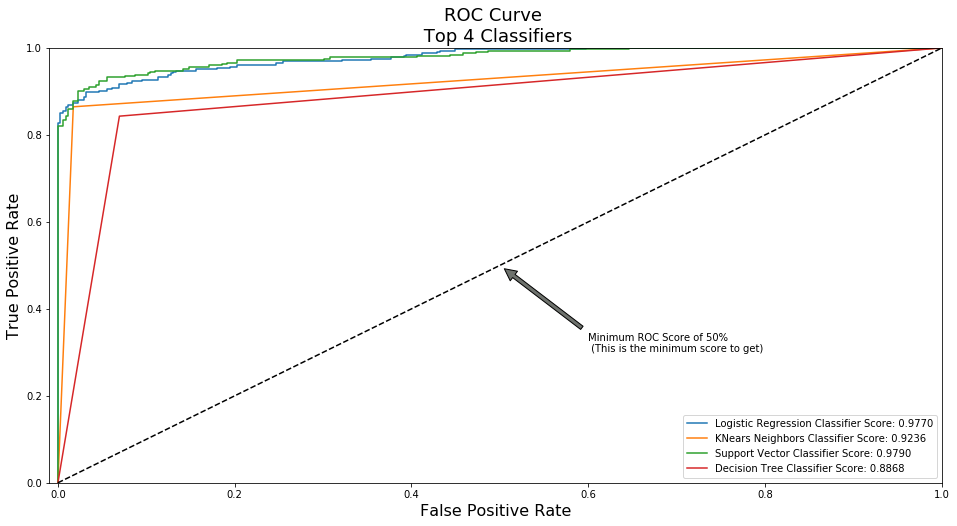

In [164]:
log_fpr, log_tpr, log_thresold = roc_curve(y, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

### Oversampling using SMOTE 

In [167]:
original_Xtrain = original_Xtrain.values
original_ytrain = original_ytrain.values

In [168]:
"""
SR - 
This piece of code takes a lot of time.
The probable reason is creation of synthetic samples from the few existing ones.
"""

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(Xtest), len(ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

#Creating logistic regression object
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 199364 | Length of y (train): 199364
Length of X (test): 85443 | Length of y (test): 85443
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9728286198804676
precision: 0.05470380105601813
recall: 0.8987163561076604
f1: 0.10311764974293322
---------------------------------------------------------------------------------------------------------------------------------------


In [171]:
y_score = best_est.decision_function(Xtest)

In [173]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.72


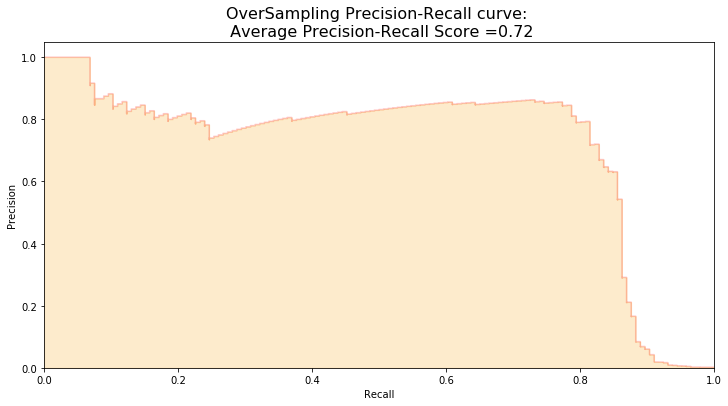

In [177]:
from sklearn.metrics import precision_recall_curve
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16);

### Predictions of test data 

We have trained two separate model on undersampled and oversampled datasets. Lets asses their performance on the test data

In [182]:
# Logistic Regression fitted using SMOTE technique
y_pred_log_reg_sm = best_est.predict(Xtest)

y_pred_log_reg = log_reg.predict(Xtest)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(Xtest)
y_pred_svc = svc.predict(Xtest)
y_pred_tree = tree_clf.predict(Xtest)

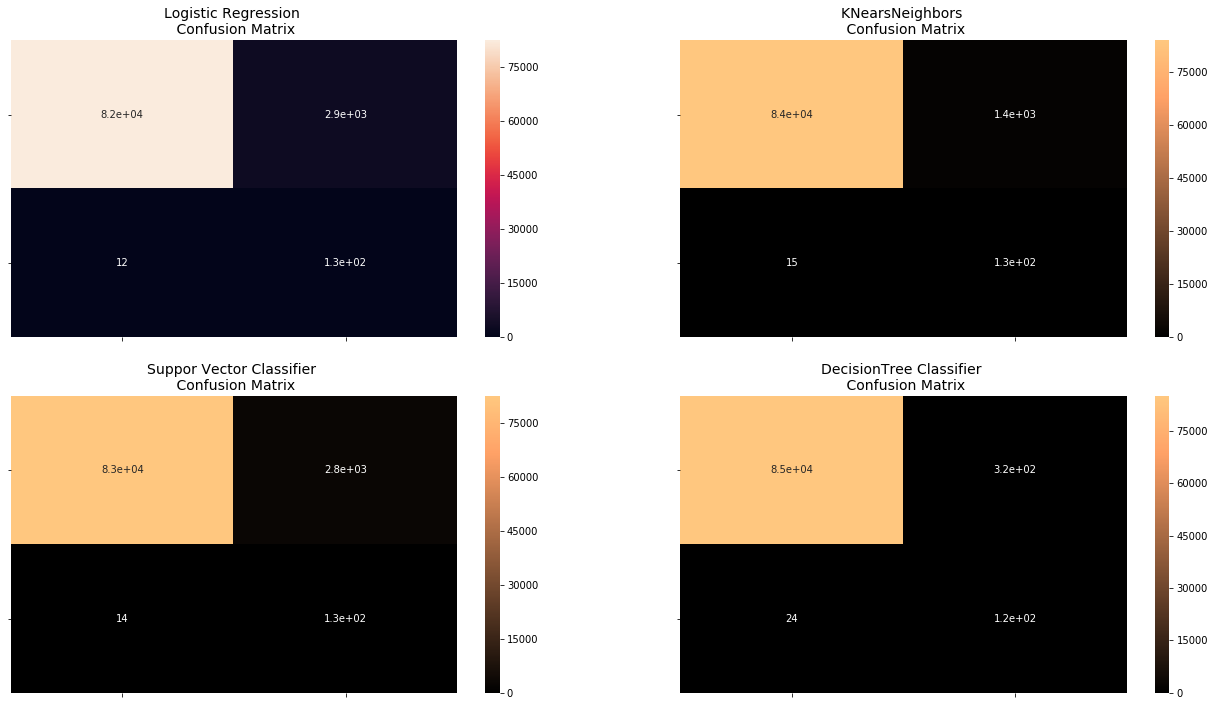

In [186]:
from sklearn.metrics import confusion_matrix

log_reg_cf = confusion_matrix(ytest, y_pred_log_reg)
kneighbors_cf = confusion_matrix(ytest, y_pred_knear)
svc_cf = confusion_matrix(ytest, y_pred_svc)
tree_cf = confusion_matrix(ytest, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [219]:
from sklearn.metrics import classification_report

print('Logistic Regression Over Sampled:')
print(classification_report(ytest, y_pred_log_reg_sm))

Logistic Regression Over Sampled:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85297
           1       0.06      0.90      0.11       146

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.97      0.99     85443



In [218]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(ytest, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(ytest, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(ytest, y_pred_svc))

print('Decision Tree Classifier:')
print(classification_report(ytest, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85297
           1       0.04      0.92      0.08       146

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85297
           1       0.08      0.90      0.15       146

    accuracy                           0.98     85443
   macro avg       0.54      0.94      0.57     85443
weighted avg       1.00      0.98      0.99     85443

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85297
           1       0.05      0.90      0.09       146

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.54     85443
weighted

### Isolation Forest 

One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

**How Isolation Forests Work**

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.

In [190]:
Fraud = df[df['class']==1]
Valid = df[df['class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
state = np.random.RandomState(42)

In [193]:
ISF = IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0)

In [201]:
X_train_isf, X_test_isf, y_train_isf, y_test_isf = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=42)

In [209]:
tic = time.time()
ISF.fit(X_train_isf)
scores_prediction = ISF.decision_function(X_test_isf)
y_pred_isf = ISF.predict(X_test_isf)

toc = time.time()
print("It took {} seconds to run this code".format(round(toc-tic)))

It took 71 seconds to run this code


In [213]:
y_pred_isf[y_pred_isf == 1] = 0
y_pred_isf[y_pred_isf == -1] = 1

In [214]:
n_errors = (y_pred_isf != y_test_isf).sum()
n_errors

191

In [215]:
print(classification_report(y_test_isf,y_pred_isf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.31      0.32      0.32       136

    accuracy                           1.00     85443
   macro avg       0.65      0.66      0.66     85443
weighted avg       1.00      1.00      1.00     85443



<a id="encapsulation"></a>

## Encapsulation 

<h3> Data </h3>

The data consisted of fradulent credit card transactions. The fradulent transactions were about 0.17% which was a classic case of class imbalance.

<h3> Data Exploration </h3>
The data consisted of a total of 30 variables. There were 28 variables that were transformed using PCA. Other than that, there were amount and time variables. The amount was right skewed. Thus I applied log transformation to transform it to a gaussian distribution. Also I downsampled to a 1:1 ratio of fraud and valid transaction to get a better idea of influencing factors and then I removed outliers in those variables.
    
<h3> Sampling </h3>
    
I implemented both undersampling and over sampling. The results in both cases were comparable and not very impressive.
However, Isolation Forest Algorithm had very better results.